# 0. IMPORT PACKAGES & DATASET

In [1]:
import pandas as pd 
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_columns', 100)
# pd.set_option('display.max_rows', None)  # Show all rows
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_parquet("loan_final.parquet")

In [3]:
# Drop columns due to possible data leakage or missing values (>60%) or noisy 
cols_to_drop = [
    'annual_inc_joint', 'verification_status_joint', 'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths', 'sec_app_mort_acc',
    'sec_app_open_acc', 'sec_app_revol_util', 'sec_app_open_act_il', 'sec_app_num_rev_accts', 'last_credit_pull_d', 'mths_since_last_record', 'mths_since_last_major_derog',
    'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_mths_since_last_major_derog', 
    'dti_joint', 'revol_bal_joint', 'url', 'desc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 
    'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'policy_code', 'hardship_flag', 'hardship_type', 'hardship_reason', 'hardship_status', 
    'deferral_term', 'hardship_amount', 'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date', 'hardship_length', 'hardship_dpd', 'hardship_loan_status',
    'orig_projected_additional_accrued_interest', 'hardship_payoff_balance_amount', 'hardship_last_payment_amount', 'debt_settlement_flag_date', 'settlement_status', 
    'settlement_date', 'settlement_amount', 'settlement_percentage', 'settlement_term', 'next_pymnt_d', 'issue_d', 'loan_status', 'title', 'emp_title', 'addr_state', 
    'zip_code', 'earliest_cr_line'
]
df = df.drop(columns=cols_to_drop)
print(df.shape)
df.head()

(2260668, 84)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,pymnt_plan,purpose,initial_list_status,disbursement_method,debt_settlement_flag,snapshot_date,emp_length,home_ownership,annual_inc,verification_status,application_type,mort_acc,num_tl_op_past_12m,inq_last_6mths,inq_last_12m,inq_fi,mths_since_last_delinq,mths_since_recent_inq,mths_since_rcnt_il,mths_since_recent_bc,acc_now_delinq,delinq_2yrs,pub_rec,collections_12_mths_ex_med,chargeoff_within_12_mths,tax_liens,pub_rec_bankruptcies,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_accts_ever_120_pd,delinq_amnt,dti,revol_bal,revol_util,total_rev_hi_lim,tot_coll_amt,tot_cur_bal,avg_cur_bal,all_util,max_bal_bc,il_util,bc_util,total_bal_il,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,tot_hi_cred_lim,open_acc,total_acc,open_acc_6m,open_act_il,open_il_12m,open_il_24m,open_rv_12m,open_rv_24m,acc_open_past_24mths,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,num_actv_bc_tl,num_actv_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_il_tl,num_bc_tl,num_op_rev_tl,num_sats,num_bc_sats,total_cu_tl,bc_open_to_buy,percent_bc_gt_75,pct_tl_nvr_dlq
0,LOAN_1653274,MEM_931131,6000,6000,6000.0,36 months,8.39,189.10,A,A5,n,credit_card,f,Cash,N,2022-01-01,< 1 year,RENT,48000.0,Not Verified,Individual,0.0,0.0,0.0,NaN,NaN,19.0,13.0,NaN,17.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,18.98,6151,39.4,15600.0,0.0,41018.0,6836.0,NaN,NaN,NaN,45.2,NaN,41018.0,13600.0,40773.0,56373.0,6.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0,90.0,86.0,17.0,13.0,1.0,1.0,8.0,1.0,11.0,6.0,5.0,6.0,4.0,NaN,7449.0,25.0,85.0
1,LOAN_812253,MEM_1111718,35000,35000,35000.0,60 months,20.99,946.68,E,E4,n,debt_consolidation,f,Cash,N,2022-01-01,< 1 year,MORTGAGE,110000.0,Verified,Individual,3.0,1.0,1.0,NaN,NaN,67.0,3.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,11.27,4093,40.5,10100.0,59.0,153530.0,21933.0,NaN,NaN,NaN,NaN,NaN,49839.0,0.0,57417.0,186222.0,8.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,141.0,189.0,31.0,3.0,0.0,2.0,6.0,2.0,6.0,3.0,3.0,8.0,0.0,NaN,NaN,NaN,87.5
2,LOAN_2156025,MEM_545144,15000,15000,15000.0,36 months,7.49,466.53,A,A4,n,credit_card,w,Cash,N,2022-01-01,2 years,RENT,95000.0,Not Verified,Individual,1.0,3.0,0.0,2.0,0.0,7.0,10.0,7.0,10.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.09,34397,44.7,76900.0,0.0,88183.0,4409.0,63.0,15084.0,86.0,50.7,53786.0,88183.0,63000.0,62783.0,139683.0,21.0,29.0,0.0,4.0,2.0,4.0,1.0,2.0,6.0,128.0,298.0,10.0,7.0,7.0,12.0,22.0,12.0,6.0,14.0,17.0,21.0,10.0,0.0,31060.0,22.2,93.1
3,LOAN_1914224,MEM_196440,7000,7000,7000.0,36 months,10.99,229.14,B,B4,n,debt_consolidation,w,Cash,N,2022-01-01,1 year,RENT,80000.0,Source Verified,Individual,0.0,1.0,1.0,3.0,0.0,NaN,1.0,40.0,85.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.89,14258,75.4,18900.0,0.0,21285.0,3041.0,65.0,4224.0,50.0,83.5,7027.0,21285.0,6200.0,14000.0,32900.0,7.0,11.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,53.0,103.0,11.0,11.0,2.0,5.0,8.0,5.0,3.0,4.0,6.0,7.0,3.0,2.0,1020.0,33.3,100.0
4,LOAN_683879,MEM_968196,15600,15600,15600.0,36 months,12.69,523.30,C,C2,n,credit_card,w,Cash,N,2022-01-01,4 years,RENT,50000.0,Not Verified,Individual,0.0,6.0,0.0,NaN,NaN,NaN,12.0,NaN,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.02,19643,77.0,25500.0,0.0,31290.0,2235.0,NaN,NaN,NaN,95.1,NaN,31290.0,17500.0,26208.0,51708.0,15.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,12.0,52.0,90.0,10.0,8.0,5.0,8.0,12.0,8.0,10.0,6.0,12.0,15.0,6.0,NaN,856.0,80.0,100.0


# 1. SPLIT DATA

In [4]:
# Sort by date column 
df = df.sort_values('snapshot_date')

# Define cutoff dates to split into train/val/test 
# Train/val/test: 2022-01-01 to 2024-03-31
# OOT1: 2024-04-01 to 2024-06-30
# OOT2: 2024-07-01 to 2024-09-30
# OOT3: 2024-10-01 to 2024-12-31

oot3 = df[(df['snapshot_date'] >= '2024-10-01') & (df['snapshot_date'] <= '2024-12-31')]
oot2 = df[(df['snapshot_date'] >= '2024-07-01') & (df['snapshot_date'] <= '2024-09-30')]
oot1 = df[(df['snapshot_date'] >= '2024-04-01') & (df['snapshot_date'] <= '2024-06-30')]
train_val_test = df[df['snapshot_date'] < '2024-04-01']


In [5]:
X = train_val_test.drop(columns=['id', 'member_id', 'grade', 'sub_grade', 'snapshot_date'])
y = train_val_test['grade']

In [6]:
X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_, y_, test_size=0.5, random_state=42)

print(X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape)

(1185713, 79) (1185713,) (254081, 79) (254081,) (254082, 79) (254082,)


# 2. DATA CLEANING & PREPROCESSING

## 2.1 Demographic Features

In [7]:
def clean_demographic_features(df): 
    df['home_ownership'] = df['home_ownership'].fillna('MISSING')
    df['annual_inc'] = df['annual_inc'].fillna(-1)
    df['emp_length'] = df['emp_length'].fillna('MISSING')

    emp_length_map = {
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10,
    'MISSING': -1  # or use np.nan if you plan to impute
    }
    df['emp_length'] = df['emp_length'].map(emp_length_map)

    df['application_type'] = df['application_type'].map({'Individual': 0, 'Joint App': 1})


    return df 

# X_train = clean_demographic_features(X_train)

## 2.2 Credit History Features

In [8]:
def clean_credit_history_features(df):
    # Fill NA with -1. 
    cols = [
        'mort_acc', 'num_tl_op_past_12m', 'inq_last_12m', 'inq_fi', 'mths_since_last_delinq',
        'mths_since_recent_inq', 'mths_since_rcnt_il', 'mths_since_recent_bc', 'num_tl_120dpd_2m',
        'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_accts_ever_120_pd'
    ]
    df = df.fillna({col: -1 for col in cols})

    # Impute missing values with the mode. 
    cols = [
        'inq_last_6mths', 'acc_now_delinq', 'delinq_2yrs', 'pub_rec', 
        'collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens', 'pub_rec_bankruptcies',
        'delinq_amnt'
    ]

    for col in cols:
        df[col] = df[col].fillna(df[col].mode()[0])

    return df

# X_train = clean_credit_history_features(X_train)

## 2.3 Financial Features

In [9]:
def clean_financial_features(df):
    # Impute with mean 
    df['dti'] = df['dti'].fillna(df['dti'].mean())
    
    # Impute with 0
    cols = [
        "revol_util", "total_rev_hi_lim", "tot_coll_amt", "tot_cur_bal", "avg_cur_bal", "all_util", "max_bal_bc", 
        "open_acc", "total_acc", "open_acc_6m", "open_act_il", "open_il_12m", "open_il_24m", "open_rv_12m", "open_rv_24m", 
        "acc_open_past_24mths", "num_actv_bc_tl", "num_actv_rev_tl", "num_rev_accts", "num_rev_tl_bal_gt_0", "num_il_tl", 
        "num_bc_tl", "num_op_rev_tl", "num_sats", "num_bc_sats", "total_cu_tl"
    ]
    df[cols] = df[cols].fillna(0)

    # Impute it with -1 
    cols = [
        "il_util", "bc_util", "total_bal_il", "total_bal_ex_mort", "total_bc_limit", "total_il_high_credit_limit", 
        "tot_hi_cred_lim", "mo_sin_old_il_acct", "mo_sin_old_rev_tl_op", "mo_sin_rcnt_rev_tl_op", "mo_sin_rcnt_tl", 
        "bc_open_to_buy", "percent_bc_gt_75", "pct_tl_nvr_dlq"
    ]
    df = df.fillna({col: -1 for col in cols})

    return df

# X_train = clean_financial_features(X_train)

## 2.4 Loan Terms & Payment Info Features

In [10]:
def clean_loan_terms_and_payment_info_features(df):
    # Convert string values to 0/1 
    binary_cols = ['pymnt_plan', 'debt_settlement_flag', 'initial_list_status', 'disbursement_method']
    df[binary_cols] = df[binary_cols].apply(lambda col: col.str.lower().map({'y': 1, 'n': 0, 'w': 1, 'f': 0, 'cash': 1, 'directpay': 0}))

    # Extract only the months
    df['term'] = df['term'].str.extract(r'(\d+)').astype(int)

    return df

# X_train = clean_loan_terms_and_payment_info_features(X_train)

In [11]:
# # Sanity check for missing values 
for col in X_train:
     print(col)
     print(X_train[col].isna().sum())

loan_amnt
0
funded_amnt
0
funded_amnt_inv
0
term
0
int_rate
0
installment
0
pymnt_plan
0
purpose
0
initial_list_status
0
disbursement_method
0
debt_settlement_flag
0
emp_length
77127
home_ownership
0
annual_inc
3
verification_status
0
application_type
0
mort_acc
26088
num_tl_op_past_12m
36809
inq_last_6mths
27
inq_last_12m
454428
inq_fi
454427
mths_since_last_delinq
608184
mths_since_recent_inq
154929
mths_since_rcnt_il
477621
mths_since_recent_bc
38439
acc_now_delinq
26
delinq_2yrs
26
pub_rec
26
collections_12_mths_ex_med
84
chargeoff_within_12_mths
84
tax_liens
62
pub_rec_bankruptcies
730
num_tl_120dpd_2m
80473
num_tl_30dpd
36809
num_tl_90g_dpd_24m
36809
num_accts_ever_120_pd
36809
delinq_amnt
26
dti
882
revol_bal
0
revol_util
980
total_rev_hi_lim
36809
tot_coll_amt
36809
tot_cur_bal
36809
avg_cur_bal
36837
all_util
454554
max_bal_bc
454427
il_util
560384
bc_util
39794
total_bal_il
454427
total_bal_ex_mort
26088
total_bc_limit
26088
total_il_high_credit_limit
36809
tot_hi_cred_lim
36

## 2.5 Clean & Preprocess X_train, X_val, X_test separately

In [12]:
X_train = clean_demographic_features(X_train)
X_train = clean_credit_history_features(X_train)
X_train = clean_financial_features(X_train)
X_train = clean_loan_terms_and_payment_info_features(X_train)

X_val = clean_demographic_features(X_val)
X_val = clean_credit_history_features(X_val)
X_val = clean_financial_features(X_val)
X_val = clean_loan_terms_and_payment_info_features(X_val)

X_test = clean_demographic_features(X_test)
X_test = clean_credit_history_features(X_test)
X_test = clean_financial_features(X_test)
X_test = clean_loan_terms_and_payment_info_features(X_test)

print(X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape)

(1185713, 79) (1185713,) (254081, 79) (254081,) (254082, 79) (254082,)


# 3. EXTRA PREPROCESSING FOR RESPECTIVE MODELS

In [13]:
X_train.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,pymnt_plan,purpose,initial_list_status,disbursement_method,debt_settlement_flag,emp_length,home_ownership,annual_inc,verification_status,application_type,mort_acc,num_tl_op_past_12m,inq_last_6mths,inq_last_12m,inq_fi,mths_since_last_delinq,mths_since_recent_inq,mths_since_rcnt_il,mths_since_recent_bc,acc_now_delinq,delinq_2yrs,pub_rec,collections_12_mths_ex_med,chargeoff_within_12_mths,tax_liens,pub_rec_bankruptcies,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_accts_ever_120_pd,delinq_amnt,dti,revol_bal,revol_util,total_rev_hi_lim,tot_coll_amt,tot_cur_bal,avg_cur_bal,all_util,max_bal_bc,il_util,bc_util,total_bal_il,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,tot_hi_cred_lim,open_acc,total_acc,open_acc_6m,open_act_il,open_il_12m,open_il_24m,open_rv_12m,open_rv_24m,acc_open_past_24mths,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,num_actv_bc_tl,num_actv_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_il_tl,num_bc_tl,num_op_rev_tl,num_sats,num_bc_sats,total_cu_tl,bc_open_to_buy,percent_bc_gt_75,pct_tl_nvr_dlq
876556,21000,21000,21000.0,36,19.72,777.45,0,debt_consolidation,0,1,0,10,RENT,56276.0,Verified,0,0.0,0.0,2.0,4.0,4.0,44.0,0.0,13.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.05,5144,51.4,10000.0,0.0,108176.0,18029.0,68.0,4868.0,73.0,97.4,103032.0,108176.0,5000.0,103113.0,113113.0,6.0,31.0,0.0,4.0,0.0,2.0,0.0,1.0,3.0,135.0,32.0,23.0,13.0,1.0,2.0,2.0,2.0,29.0,1.0,2.0,6.0,1.0,3.0,132.0,100.0,92.0
1231439,16000,16000,16000.0,60,7.97,324.20,0,debt_consolidation,0,1,0,0,MORTGAGE,82000.0,Not Verified,1,1.0,1.0,0.0,0.0,0.0,-1.0,13.0,40.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.16,1692,6.9,24400.0,0.0,163837.0,23405.0,44.0,84.0,69.0,0.6,25980.0,27672.0,14400.0,37925.0,210778.0,8.0,24.0,0.0,2.0,0.0,0.0,1.0,1.0,1.0,137.0,136.0,9.0,9.0,2.0,3.0,8.0,3.0,15.0,4.0,5.0,8.0,3.0,1.0,14308.0,0.0,100.0
1131787,30000,30000,29900.0,60,13.99,697.90,0,debt_consolidation,0,1,0,1,RENT,192000.0,Source Verified,0,0.0,0.0,0.0,-1.0,-1.0,-1.0,11.0,-1.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.27,24173,86.0,28100.0,0.0,244376.0,22216.0,0.0,0.0,-1.0,86.0,-1.0,244376.0,28100.0,218549.0,246649.0,11.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,123.0,113.0,26.0,15.0,6.0,6.0,9.0,6.0,20.0,9.0,6.0,11.0,6.0,0.0,3927.0,83.3,100.0
505502,10800,10800,10800.0,36,13.44,366.19,0,debt_consolidation,1,1,0,1,MORTGAGE,88000.0,Source Verified,0,4.0,2.0,0.0,2.0,1.0,5.0,9.0,4.0,30.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.20,23070,73.5,31400.0,0.0,549530.0,22897.0,84.0,6576.0,89.0,94.5,138884.0,162502.0,23500.0,164915.0,599509.0,25.0,59.0,1.0,10.0,1.0,3.0,1.0,1.0,5.0,160.0,150.0,9.0,4.0,6.0,9.0,26.0,9.0,28.0,10.0,12.0,25.0,7.0,2.0,1290.0,100.0,96.4
910324,10800,10800,10775.0,60,13.99,251.25,0,credit_card,0,1,0,10,RENT,51500.0,Not Verified,0,0.0,1.0,1.0,-1.0,-1.0,26.0,5.0,-1.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.18,11167,72.7,15356.0,0.0,11167.0,1861.0,0.0,0.0,-1.0,96.6,-1.0,11167.0,11556.0,0.0,15356.0,8.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,125.0,211.0,9.0,9.0,3.0,3.0,26.0,3.0,1.0,17.0,8.0,8.0,4.0,0.0,389.0,75.0,100.0


In [14]:
# Standard Scaling 
# loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, emp_length
# annual_inc, mort_acc, num_tl_op_past_12m, inq_last_6mths, inq_last_12m, inq_fi,
# mths_since_last_delinq, mths_since_recent_inq, mths_since_rcnt_il, mths_since_recent_bc,
# acc_now_delinq, delinq_2yrs, pub_rec, collections_12_mths_ex_med, chargeoff_within_12_mths
# tax_liens, pub_rec_bankruptcies, num_tl_120dpd_2m, num_tl_30dpd, num_tl_90g_dpd_24m, 
# num_accts_ever_120_pd, delinq_amnt, dti, revol_bal, revol_util, total_rev_hi_lim, tot_coll_amt
# tot_cur_bal, avg_cur_bal and the rest. 

# One-hot encoding
# purpose, home_ownership, verification_status, 

# Binary 
# pymnt_plan, initial_list_status, disbursement_method, debt_settlement_flag, application_type
# 

X_train.avg_cur_bal.value_counts(dropna=False)
# X_train.loan_status.info()

avg_cur_bal
0.0        37277
2542.0       177
2442.0       165
2750.0       164
2758.0       161
           ...  
72237.0        1
41498.0        1
75915.0        1
58656.0        1
35966.0        1
Name: count, Length: 68863, dtype: int64

# Extra Preprocessing 

In [15]:
# ── 0. Convert snapshot_date to actual datetime (avoid string comparison pitfalls)
df['snapshot_date'] = pd.to_datetime(df['snapshot_date'])

# ── 1. Keep OOT slice unchanged, but write it in a more robust way  
OOT1 = df[df['snapshot_date'].between('2024-04-01', '2024-06-30')]
OOT2 = df[df['snapshot_date'].between('2024-07-01', '2024-09-30')]
OOT3 = df[df['snapshot_date'].between('2024-10-01', '2024-12-31')]
train_val_test = df[df['snapshot_date'] < '2024-04-01']

# ── 2. Split X / y  
X = train_val_test.drop(columns=['id','member_id','grade','sub_grade','snapshot_date'])
y = train_val_test['grade']            # ← string multi-classification 

# ── 3. stratified split 70/15/15
from sklearn.model_selection import train_test_split
X_train, X_tmp, y_train, y_tmp = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)
X_val,   X_test, y_val, y_test = train_test_split(
    X_tmp, y_tmp, test_size=0.50, random_state=42, stratify=y_tmp
)

# ── 4. Cleaning + encoding: fit only on train, then transform others
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.impute import SimpleImputer

## 4.1 Uniform OrdinalEncoder for categorical columns (more memory-friendly than one-hot)  
cat_cols = X_train.select_dtypes('object').columns.tolist()
enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X_train[cat_cols] = enc.fit_transform(X_train[cat_cols])
X_val[cat_cols]   = enc.transform(X_val[cat_cols])
X_test[cat_cols]  = enc.transform(X_test[cat_cols])

## 4.2 Fill missing values for numerical columns (median) 
num_cols = X_train.columns.difference(cat_cols)
imp = SimpleImputer(strategy='median')
X_train[num_cols] = imp.fit_transform(X_train[num_cols])
X_val[num_cols]   = imp.transform(X_val[num_cols])
X_test[num_cols]  = imp.transform(X_test[num_cols])

## 4.3 Label encoding  
lab = LabelEncoder()
y_train = lab.fit_transform(y_train)
y_val   = lab.transform(y_val)
y_test  = lab.transform(y_test)
n_class = len(lab.classes_)


# Xgboost Model setup

In [30]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score, accuracy_score

model = xgb.XGBClassifier(
    objective       = 'multi:softprob',
    num_class       = n_class,
    n_estimators    = 800,
    max_depth       = 6,
    learning_rate   = 0.05,
    subsample       = 0.8,
    colsample_bytree= 0.8,
    eval_metric     = 'mlogloss',
    n_jobs          = -1,
    random_state    = 42
)

model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    early_stopping_rounds=30,
    verbose=50
)

pred_val  = model.predict(X_val)
pred_test = model.predict(X_test)

c:\Users\19892\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-mlogloss:1.83284
[50]	validation_0-mlogloss:0.32940
[100]	validation_0-mlogloss:0.16408
[150]	validation_0-mlogloss:0.12548
[200]	validation_0-mlogloss:0.10805
[250]	validation_0-mlogloss:0.09802
[300]	validation_0-mlogloss:0.09115
[350]	validation_0-mlogloss:0.08597
[400]	validation_0-mlogloss:0.08248
[450]	validation_0-mlogloss:0.08031
[500]	validation_0-mlogloss:0.07865
[550]	validation_0-mlogloss:0.07730
[600]	validation_0-mlogloss:0.07633
[650]	validation_0-mlogloss:0.07562
[700]	validation_0-mlogloss:0.07494
[750]	validation_0-mlogloss:0.07441
[799]	validation_0-mlogloss:0.07389


Backup Plan-save the model

In [ ]:
from pathlib import Path
import joblib


ART_DIR = Path("artifacts")
ART_DIR.mkdir(exist_ok=True)


MODEL_PATH = ART_DIR / "baseline_xgb.json"
model.save_model(MODEL_PATH)
print(f"✅  XGBoost model saved →  {MODEL_PATH}")


BUNDLE_PATH = ART_DIR / "preprocessors.pkl"
bundle = {
    "enc"      : enc,        # OrdinalEncoder
    "imp"      : imp,        # SimpleImputer
    "lab"      : lab,        # LabelEncoder
    "cat_cols" : cat_cols,   # list[str]
    "num_cols" : num_cols,   # list[str] / pandas Index
}
joblib.dump(bundle, BUNDLE_PATH)
print(f"✅  Pre-processors saved → {BUNDLE_PATH}")

✅  XGBoost model saved →  artifacts\baseline_xgb.json
✅  Pre-processors saved → artifacts\preprocessors.pkl


Reload Model

In [16]:
import joblib
import xgboost as xgb
import pandas as pd


bundle = joblib.load("artifacts/preprocessors.pkl")
enc = bundle["enc"]
imp = bundle["imp"]
lab = bundle["lab"]
cat_cols = bundle["cat_cols"]
num_cols = bundle["num_cols"]


model = xgb.Booster()
model.load_model("artifacts/baseline_xgb.json")


SHapley Additive exPlanations

In [17]:
import shap
import numpy as np


explainer = shap.Explainer(model, feature_perturbation="tree_path_dependent")


sample_size = 2000

X_val_s   = shap.sample(X_val,   np.minimum(sample_size, len(X_val)),   random_state=42)
X_test_s  = shap.sample(X_test,  np.minimum(sample_size, len(X_test)),  random_state=42)


🔹 Validation Set  –  Global Feature Importance


C:\Users\19892\AppData\Local\Temp\ipykernel_16316\687880073.py:8: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_val, X_val_s, plot_type="bar", show=False)


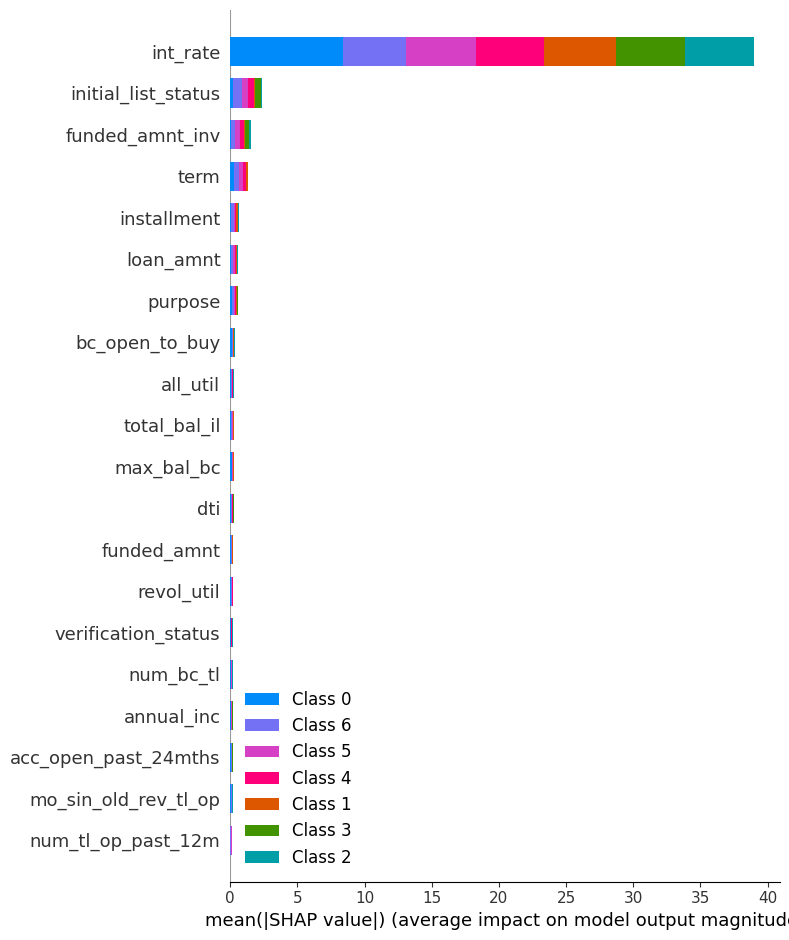


🔹 Validation Set  –  Per-sample Contribution


C:\Users\19892\AppData\Local\Temp\ipykernel_16316\687880073.py:12: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_val, X_val_s, max_display=20)     # beeswarm


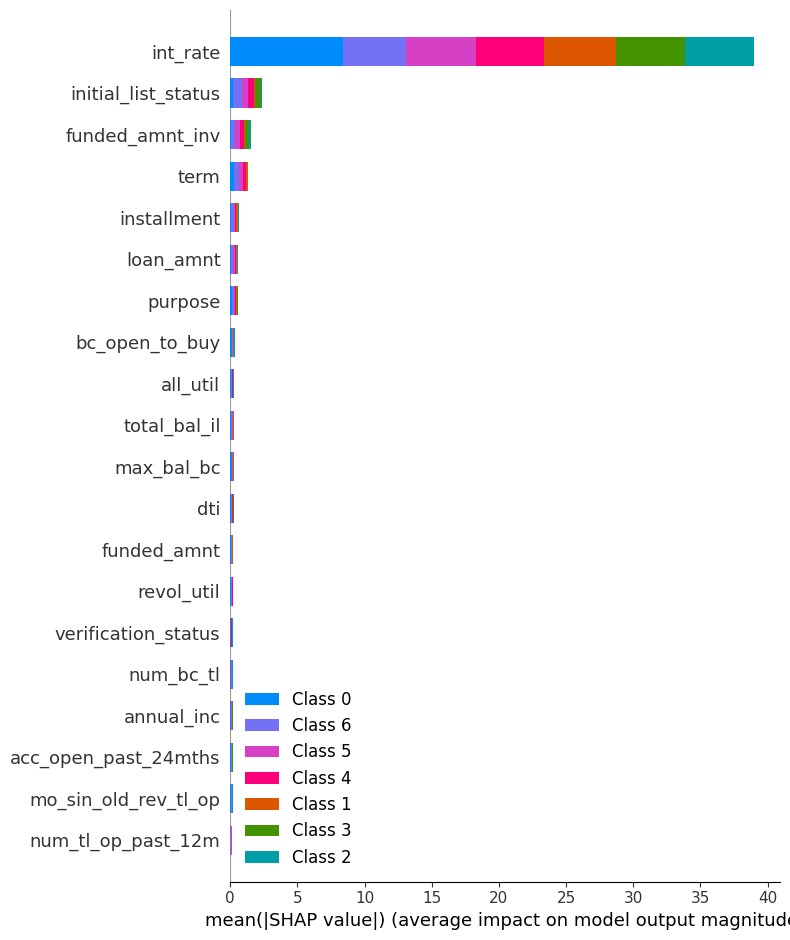


🔸 Test Set  –  Global Feature Importance


C:\Users\19892\AppData\Local\Temp\ipykernel_16316\687880073.py:15: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_test, X_test_s, plot_type="bar", show=False)


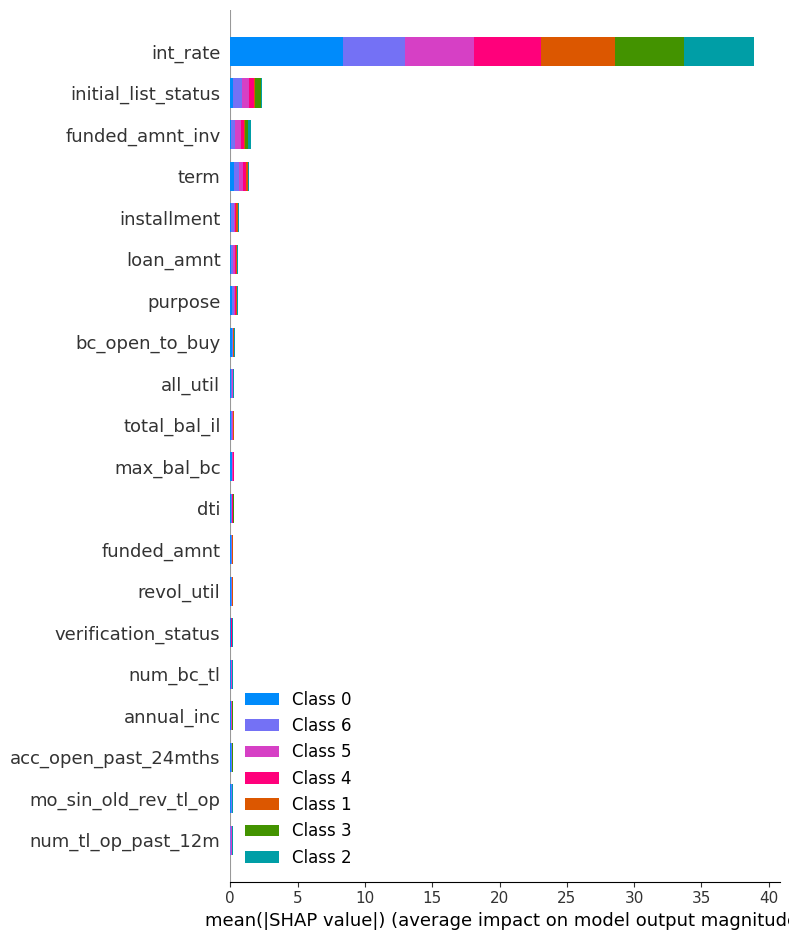


🔸 Test Set  –  Per-sample Contribution


C:\Users\19892\AppData\Local\Temp\ipykernel_16316\687880073.py:19: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_test, X_test_s, max_display=20)   # beeswarm


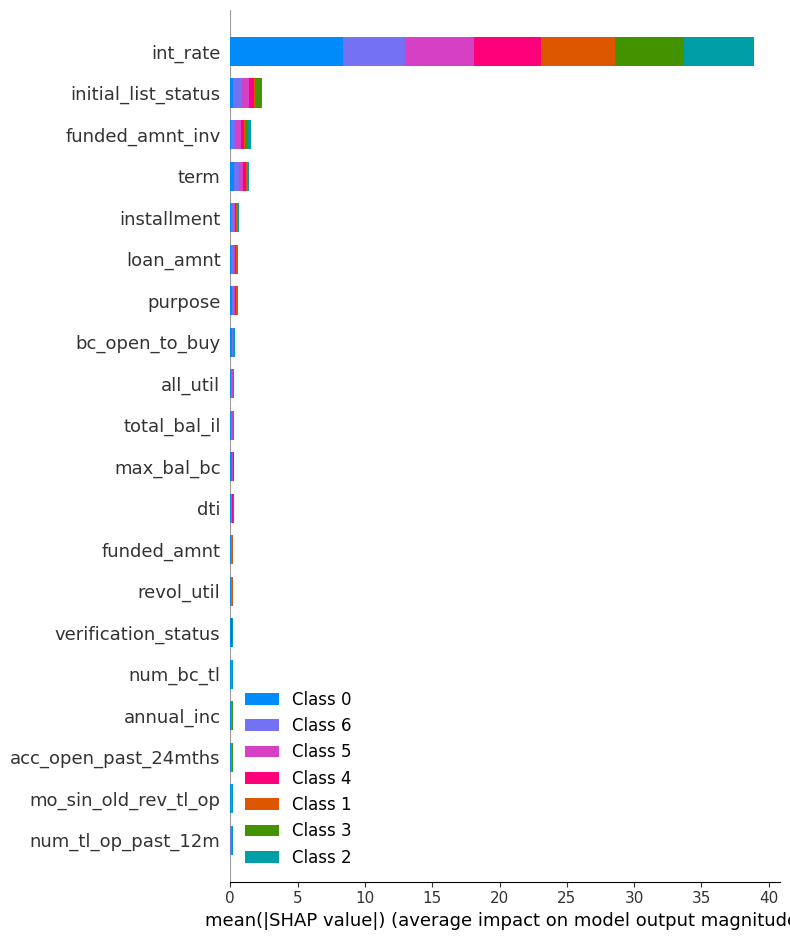

In [ ]:
# 3️⃣  calculate SHAP

shap_values_val  = explainer(X_val_s)
shap_values_test = explainer(X_test_s)

# 4️⃣  visualization
print("\n🔹 Validation Set  –  Global Feature Importance")
shap.summary_plot(shap_values_val, X_val_s, plot_type="bar", show=False)
plt.tight_layout(); plt.show()

print("\n🔹 Validation Set  –  Per-sample Contribution")
shap.summary_plot(shap_values_val, X_val_s, max_display=20)     # beeswarm

print("\n🔸 Test Set  –  Global Feature Importance")
shap.summary_plot(shap_values_test, X_test_s, plot_type="bar", show=False)
plt.tight_layout(); plt.show()

print("\n🔸 Test Set  –  Per-sample Contribution")
shap.summary_plot(shap_values_test, X_test_s, max_display=20)   # beeswarm

# COMPLETE PIPELINE ▶︎  Baseline → Fine-tuning → Evaluation

In [28]:
import joblib
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# === 1. load atifacts and model ===
bundle = joblib.load('artifacts/preprocessors.pkl')
enc = bundle["enc"]
imp = bundle["imp"]
lab = bundle["lab"]
cat_cols = bundle["cat_cols"]
num_cols = bundle["num_cols"]

model = xgb.Booster()
model.load_model("artifacts/baseline_xgb.json")

In [ ]:
# === 2. load dataset & transform ===
DROP_COLS = ['id', 'member_id', 'grade', 'sub_grade', 'snapshot_date']

def preprocess(df):
    X = df.drop(columns=DROP_COLS)
    y = lab.transform(df['grade'])
    X[cat_cols] = enc.transform(X[cat_cols])
    X[num_cols] = imp.transform(X[num_cols])
    return X, y

# X_val, y_val, X_test, y_test r processed

X_oot1, y_oot1 = preprocess(oot1)
X_oot2, y_oot2 = preprocess(oot2)
X_oot3, y_oot3 = preprocess(oot3)

In [ ]:
# === 3. Baseline Model Evaluation ===
metrics = []

def evaluate_booster(booster, name, X, y_true):
    dmatrix = xgb.DMatrix(X)
    y_prob = booster.predict(dmatrix)
    y_pred = np.argmax(y_prob, axis=1)
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='macro')
    print(f"\n--- {name} ---")
    print(f"Accuracy: {acc:.4f} | F1 (macro): {f1:.4f}")
    print(classification_report(y_true, y_pred, target_names=lab.classes_))
    metrics.append({"Dataset": name, "Accuracy": acc, "F1 Score": f1})

for name, X, y in [
    ("Train", X_train, y_train),
    ("Val", X_val, y_val),
    ("Test", X_test, y_test),
    ("OOT1", X_oot1, y_oot1),
    ("OOT2", X_oot2, y_oot2),
    ("OOT3", X_oot3, y_oot3),
]:
    evaluate_booster(model, name, X, y)


--- Train ---
Accuracy: 0.9751 | F1 (macro): 0.9706
              precision    recall  f1-score   support

           A       1.00      1.00      1.00    227326
           B       0.98      0.99      0.98    348080
           C       0.98      0.96      0.97    340701
           D       0.94      0.97      0.95    170243
           E       0.94      0.92      0.93     71135
           F       0.97      0.97      0.97     21876
           G       0.99      0.99      0.99      6352

    accuracy                           0.98   1185713
   macro avg       0.97      0.97      0.97   1185713
weighted avg       0.98      0.98      0.98   1185713


--- Val ---
Accuracy: 0.9680 | F1 (macro): 0.9533
              precision    recall  f1-score   support

           A       1.00      1.00      1.00     48712
           B       0.97      0.98      0.98     74588
           C       0.97      0.96      0.97     73007
           D       0.93      0.96      0.94     36481
           E       0.92     


--- Train ---
Accuracy: 0.9751 | F1 (macro): 0.9706
              precision    recall  f1-score   support

           A       1.00      1.00      1.00    227326
           B       0.98      0.99      0.98    348080
           C       0.98      0.96      0.97    340701
           D       0.94      0.97      0.95    170243
           E       0.94      0.92      0.93     71135
           F       0.97      0.97      0.97     21876
           G       0.99      0.99      0.99      6352

    accuracy                           0.98   1185713
   macro avg       0.97      0.97      0.97   1185713
weighted avg       0.98      0.98      0.98   1185713



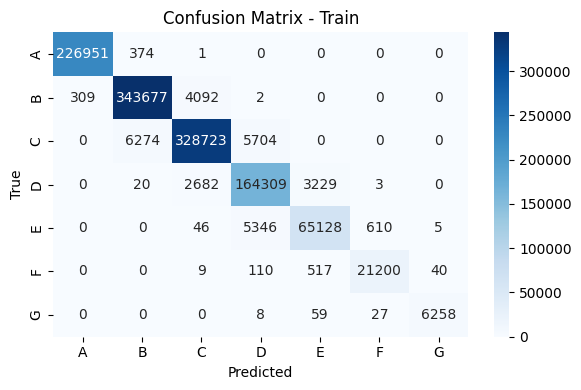


--- Val ---
Accuracy: 0.9680 | F1 (macro): 0.9533
              precision    recall  f1-score   support

           A       1.00      1.00      1.00     48712
           B       0.97      0.98      0.98     74588
           C       0.97      0.96      0.97     73007
           D       0.93      0.96      0.94     36481
           E       0.92      0.89      0.91     15244
           F       0.94      0.93      0.94      4688
           G       0.98      0.92      0.95      1361

    accuracy                           0.97    254081
   macro avg       0.96      0.95      0.95    254081
weighted avg       0.97      0.97      0.97    254081



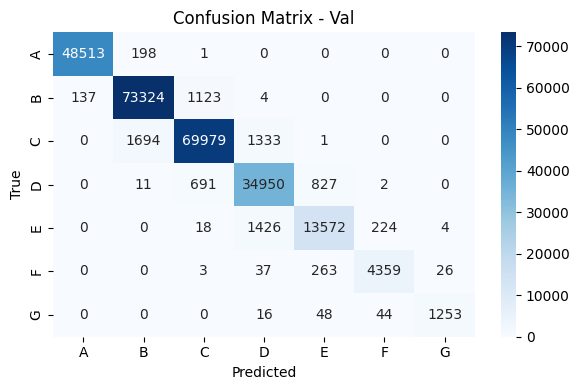


--- Test ---
Accuracy: 0.9680 | F1 (macro): 0.9538
              precision    recall  f1-score   support

           A       1.00      1.00      1.00     48713
           B       0.97      0.98      0.98     74589
           C       0.97      0.96      0.97     73008
           D       0.93      0.96      0.94     36480
           E       0.92      0.89      0.91     15243
           F       0.94      0.93      0.93      4688
           G       0.98      0.93      0.95      1361

    accuracy                           0.97    254082
   macro avg       0.96      0.95      0.95    254082
weighted avg       0.97      0.97      0.97    254082



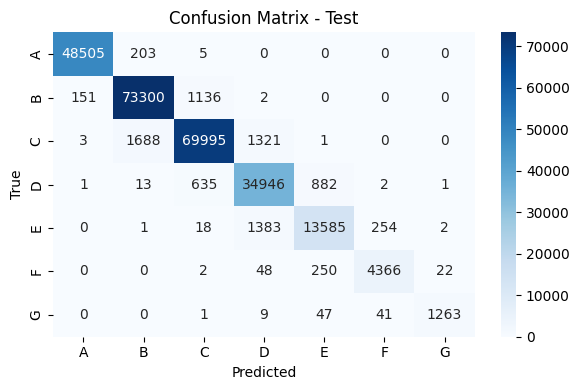


--- OOT1 ---
Accuracy: 0.9620 | F1 (macro): 0.9430
              precision    recall  f1-score   support

           A       0.99      0.99      0.99     35701
           B       0.97      0.98      0.98     55025
           C       0.97      0.95      0.96     54278
           D       0.91      0.95      0.93     27033
           E       0.91      0.87      0.89     11240
           F       0.93      0.92      0.92      3453
           G       0.97      0.89      0.93      1029

    accuracy                           0.96    187759
   macro avg       0.95      0.94      0.94    187759
weighted avg       0.96      0.96      0.96    187759



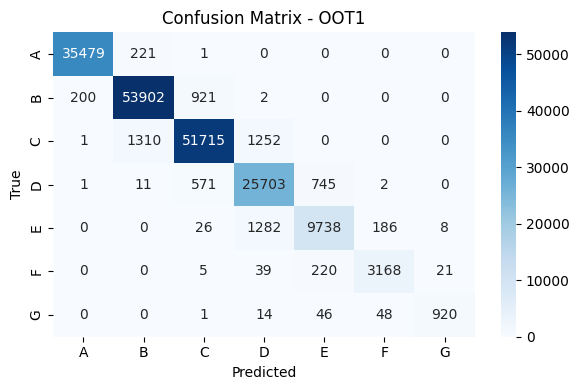


--- OOT2 ---
Accuracy: 0.9611 | F1 (macro): 0.9398
              precision    recall  f1-score   support

           A       0.99      0.99      0.99     36283
           B       0.97      0.98      0.97     55692
           C       0.97      0.95      0.96     54520
           D       0.91      0.95      0.93     27040
           E       0.90      0.86      0.88     11520
           F       0.92      0.91      0.92      3587
           G       0.96      0.89      0.92      1015

    accuracy                           0.96    189657
   macro avg       0.95      0.93      0.94    189657
weighted avg       0.96      0.96      0.96    189657



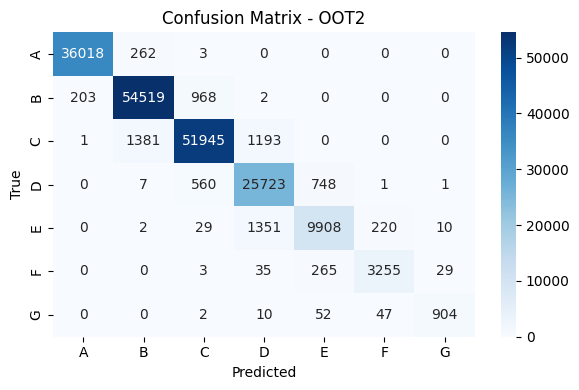


--- OOT3 ---
Accuracy: 0.9611 | F1 (macro): 0.9415
              precision    recall  f1-score   support

           A       0.99      0.99      0.99     36292
           B       0.97      0.98      0.98     55583
           C       0.97      0.95      0.96     54539
           D       0.91      0.95      0.93     27147
           E       0.90      0.86      0.88     11257
           F       0.93      0.91      0.92      3508
           G       0.96      0.90      0.93      1050

    accuracy                           0.96    189376
   macro avg       0.95      0.93      0.94    189376
weighted avg       0.96      0.96      0.96    189376



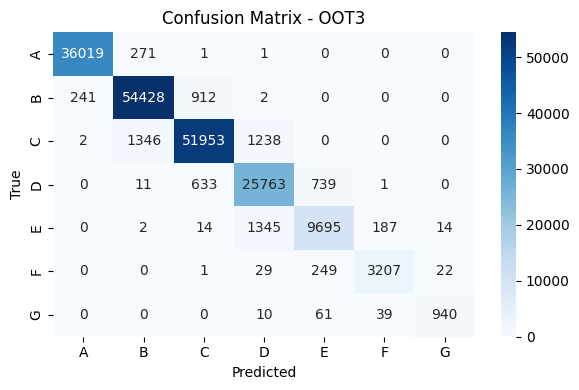

In [36]:
metrics = []

def evaluate_booster(booster, name, X, y_true):
    dmatrix = xgb.DMatrix(X)
    y_prob = booster.predict(dmatrix)
    y_pred = np.argmax(y_prob, axis=1)
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='macro')
    print(f"\n--- {name} ---")
    print(f"Accuracy: {acc:.4f} | F1 (macro): {f1:.4f}")
    print(classification_report(y_true, y_pred, target_names=lab.classes_))
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=lab.classes_, yticklabels=lab.classes_)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.show()
    metrics.append({"Dataset": name, "Accuracy": acc, "F1 Score": f1})

for name, X, y in [
    ("Train", X_train, y_train),
    ("Val", X_val, y_val),
    ("Test", X_test, y_test),
    ("OOT1", X_oot1, y_oot1),
    ("OOT2", X_oot2, y_oot2),
    ("OOT3", X_oot3, y_oot3),
]:
    evaluate_booster(model, name, X, y)

# Fine-tuning

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import numpy as np

# 1️⃣ 20 % of subset - hyperparam search
X_sub, _, y_sub, _ = train_test_split(
    X_train, y_train,
    test_size=0.80, stratify=y_train, random_state=42
)

n_class = len(np.unique(y_train))

base_clf = xgb.XGBClassifier(
    objective='multi:softprob',
    num_class=n_class,
    eval_metric='mlogloss',
    tree_method='hist',          
    n_jobs=-1,
    random_state=42
)

param_dist = {
    "max_depth"        : [4, 6, 8],
    "learning_rate"    : [0.02, 0.05],
    "n_estimators"     : [600],          
    "subsample"        : [0.8],
    "colsample_bytree" : [0.8]
}

search = RandomizedSearchCV(
    estimator        = base_clf,
    param_distributions = param_dist,
    n_iter           = 12,          
    cv               = 2,
    scoring          = "f1_macro",
    verbose          = 1,
    random_state     = 42
)

search.fit(
    X_sub, y_sub,
    eval_set=[(X_val, y_val)],
    early_stopping_rounds=30,       
    verbose=False
)

print("🔍 Best params on 20% subset:", search.best_params_)

# 2️⃣ best hpyer params + retrain
best_params = {**search.best_params_}

final_clf = xgb.XGBClassifier(
    **best_params,
    objective='multi:softprob',
    num_class=n_class,
    eval_metric='mlogloss',
    tree_method='hist',
    n_jobs=-1,
    random_state=42
)

final_clf.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    early_stopping_rounds=30,
    verbose=100
)

print("best_iterations:",
      final_clf.best_iteration if hasattr(final_clf, "best_iteration") else "N/A")


c:\Users\19892\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=12. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\19892\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Fitting 2 folds for each of 6 candidates, totalling 12 fits


c:\Users\19892\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\19892\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\19892\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\19892\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stoppin

🔍 Best params on 20% subset: {'subsample': 0.8, 'n_estimators': 600, 'max_depth': 8, 'learning_rate': 0.02, 'colsample_bytree': 0.8}


c:\Users\19892\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-mlogloss:1.88509
[100]	validation_0-mlogloss:0.42300
[200]	validation_0-mlogloss:0.21099
[300]	validation_0-mlogloss:0.16320
[400]	validation_0-mlogloss:0.14956
[500]	validation_0-mlogloss:0.14410
[599]	validation_0-mlogloss:0.14159
✅ 全量训练完成 — best_iterations: 599


In [ ]:
best_params = search.best_params_.copy()
continued_clf = xgb.XGBClassifier(
    **best_params,
    objective='multi:softprob', num_class=n_class,
    eval_metric='mlogloss',
    tree_method='hist', n_jobs=-1,
    random_state=42
)

# booster_from_sub  Booster
booster_from_sub = search.best_estimator_.get_booster()

continued_clf.fit(
    X_train, y_train,                 
    xgb_model=booster_from_sub,       
    eval_set=[(X_val, y_val)],
    callbacks=[xgb.callback.EarlyStopping(rounds=30)],
    verbose=100
)


c:\Users\19892\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-mlogloss:0.15803
[100]	validation_0-mlogloss:0.14609
[200]	validation_0-mlogloss:0.14361
[300]	validation_0-mlogloss:0.14212
[400]	validation_0-mlogloss:0.14099
[500]	validation_0-mlogloss:0.14008
[599]	validation_0-mlogloss:0.13929


,objective,'multi:softprob'
,use_label_encoder,None
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'mlogloss'


In [ ]:
# save best params 
from pathlib import Path
import json, joblib, datetime, xgboost as xgb

ARTIFACTS_DIR = Path("artifacts")
ARTIFACTS_DIR.mkdir(exist_ok=True)

stamp = datetime.datetime.now().strftime("%Y%m%d_%H%M")

# 1. Save super params
params_to_save = continued_clf.get_xgb_params()
params_to_save["best_iteration"] = int(getattr(continued_clf, "best_iteration", -1))

with open(ARTIFACTS_DIR / f"xgb_finetuned_params_{stamp}.json", "w") as f:
    json.dump(params_to_save, f, indent=2)
print("✅ params.json saved")

# 2. Save Booster
continued_clf.get_booster().save_model(
    ARTIFACTS_DIR / f"xgb_finetuned_{stamp}.json"
)
print("✅ booster.json saved")

# 3. Save the whole sklearn
joblib.dump(
    continued_clf,
    ARTIFACTS_DIR / f"xgb_finetuned_{stamp}.pkl"
)
print("✅ joblib.pkl saved")


✅ params.json saved
✅ booster.json saved
✅ joblib.pkl saved


# Final Evaluation


--- FT_Train ---
Accuracy: 0.9558 | F1 (macro): 0.9042
              precision    recall  f1-score   support

           A       0.99      0.99      0.99    227326
           B       0.97      0.98      0.97    348080
           C       0.96      0.96      0.96    340701
           D       0.91      0.94      0.93    170243
           E       0.87      0.84      0.85     71135
           F       0.86      0.75      0.80     21876
           G       0.82      0.82      0.82      6352

    accuracy                           0.96   1185713
   macro avg       0.91      0.90      0.90   1185713
weighted avg       0.96      0.96      0.96   1185713



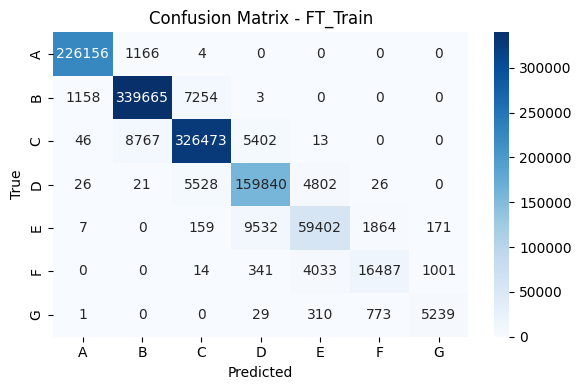


--- FT_Val ---
Accuracy: 0.9399 | F1 (macro): 0.8404
              precision    recall  f1-score   support

           A       0.99      0.99      0.99     48712
           B       0.96      0.97      0.96     74588
           C       0.95      0.94      0.95     73007
           D       0.89      0.92      0.91     36481
           E       0.82      0.79      0.80     15244
           F       0.74      0.62      0.67      4688
           G       0.62      0.58      0.60      1361

    accuracy                           0.94    254081
   macro avg       0.85      0.83      0.84    254081
weighted avg       0.94      0.94      0.94    254081



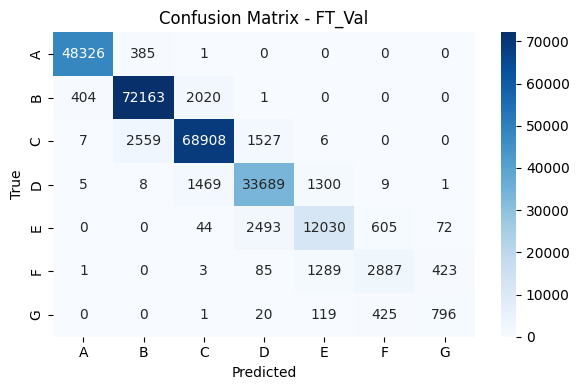


--- FT_Test ---
Accuracy: 0.9397 | F1 (macro): 0.8422
              precision    recall  f1-score   support

           A       0.99      0.99      0.99     48713
           B       0.96      0.97      0.96     74589
           C       0.95      0.94      0.95     73008
           D       0.89      0.92      0.91     36480
           E       0.81      0.79      0.80     15243
           F       0.74      0.60      0.66      4688
           G       0.62      0.63      0.62      1361

    accuracy                           0.94    254082
   macro avg       0.85      0.83      0.84    254082
weighted avg       0.94      0.94      0.94    254082



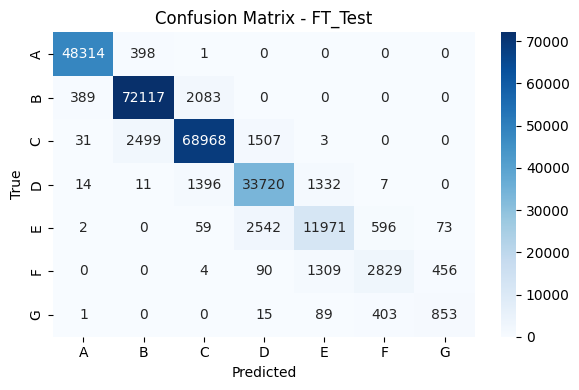


--- FT_OOT1 ---
Accuracy: 0.9286 | F1 (macro): 0.8100
              precision    recall  f1-score   support

           A       0.99      0.99      0.99     35701
           B       0.96      0.96      0.96     55025
           C       0.94      0.94      0.94     54278
           D       0.87      0.91      0.89     27033
           E       0.77      0.74      0.75     11240
           F       0.67      0.55      0.61      3453
           G       0.56      0.51      0.54      1029

    accuracy                           0.93    187759
   macro avg       0.82      0.80      0.81    187759
weighted avg       0.93      0.93      0.93    187759



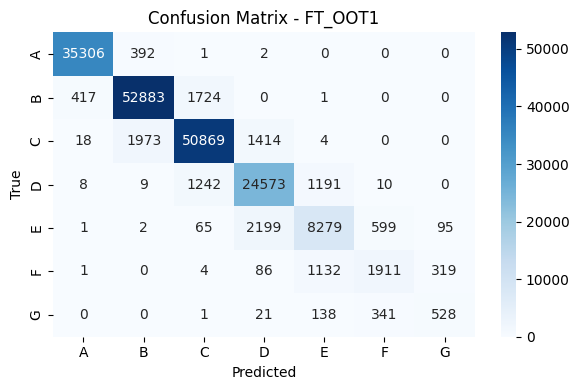


--- FT_OOT2 ---
Accuracy: 0.9266 | F1 (macro): 0.8053
              precision    recall  f1-score   support

           A       0.99      0.99      0.99     36283
           B       0.96      0.96      0.96     55692
           C       0.94      0.94      0.94     54520
           D       0.86      0.91      0.88     27040
           E       0.76      0.72      0.74     11520
           F       0.66      0.53      0.59      3587
           G       0.54      0.53      0.53      1015

    accuracy                           0.93    189657
   macro avg       0.82      0.80      0.81    189657
weighted avg       0.93      0.93      0.93    189657



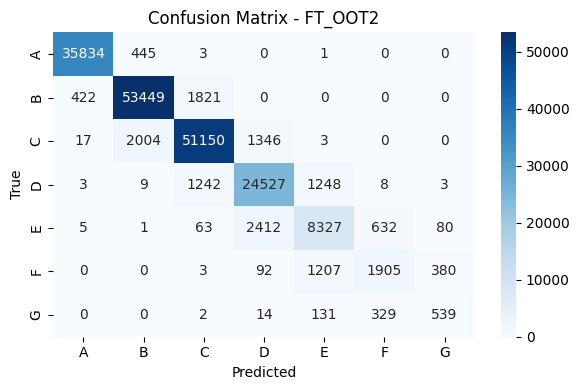


--- FT_OOT3 ---
Accuracy: 0.9267 | F1 (macro): 0.8069
              precision    recall  f1-score   support

           A       0.99      0.99      0.99     36292
           B       0.96      0.96      0.96     55583
           C       0.94      0.94      0.94     54539
           D       0.86      0.91      0.88     27147
           E       0.76      0.73      0.74     11257
           F       0.66      0.53      0.59      3508
           G       0.56      0.52      0.54      1050

    accuracy                           0.93    189376
   macro avg       0.82      0.80      0.81    189376
weighted avg       0.93      0.93      0.93    189376



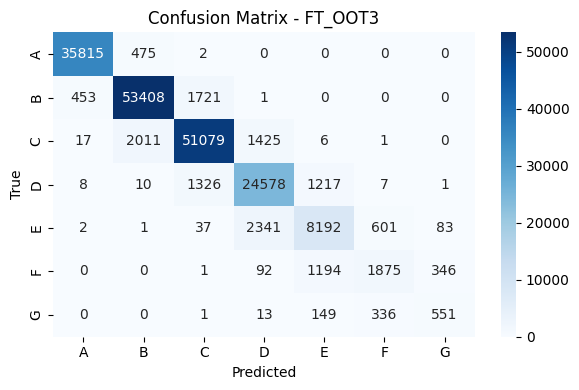

In [ ]:

ft_booster = continued_clf.get_booster()      



# === Same as baseline ===
metrics_ft = []           #  fine-tuned metrics

for name, X, y in [
    ("Train", X_train, y_train),
    ("Val",   X_val,   y_val),
    ("Test",  X_test,  y_test),
    ("OOT1",  X_oot1,  y_oot1),
    ("OOT2",  X_oot2,  y_oot2),
    ("OOT3",  X_oot3,  y_oot3),
]:
    evaluate_booster(ft_booster, f"FT_{name}", X, y)      
    y_prob = ft_booster.predict(xgb.DMatrix(X))
    y_pred = np.argmax(y_prob, axis=1)
    metrics_ft.append({
        "Dataset":  name,
        "Acc_ft":   accuracy_score(y, y_pred),
        "F1_ft":    f1_score(y, y_pred, average='macro')
    })


In [ ]:
import pandas as pd

# Saved in metrics list; reload or recompute if kernel was restarted
df_base = (pd.DataFrame(metrics)          
           .rename(columns={"Accuracy": "Acc_base", "F1 Score": "F1_base"}))

# fine-tuned results
df_ft   = pd.DataFrame(metrics_ft)

#  Merge & Calculate Improvement
df_all = (df_base.merge(df_ft, on="Dataset")
                 .assign(ΔAcc=lambda d: d.Acc_ft - d.Acc_base,
                         ΔF1 =lambda d: d.F1_ft  - d.F1_base)
                 .set_index("Dataset")
                 .round(4))
display(df_all)


,Acc_base,F1_base,Acc_ft,F1_ft,ΔAcc,ΔF1
Dataset,,,,,,
Train,0.9751,0.9706,0.9558,0.9042,-0.0194,-0.0664
Val,0.9680,0.9533,0.9399,0.8404,-0.0281,-0.1129
Test,0.9680,0.9538,0.9397,0.8422,-0.0283,-0.1116
OOT1,0.9620,0.9430,0.9286,0.8100,-0.0334,-0.1330
OOT2,0.9611,0.9398,0.9266,0.8053,-0.0345,-0.1345
OOT3,0.9611,0.9415,0.9267,0.8069,-0.0344,-0.1346


# Use SHAP to compare baseline model with fine-tuned one

C:\Users\19892\AppData\Local\Temp\ipykernel_16316\2925303815.py:18: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_base, X_sample, max_display=10, plot_type="bar", show=False)
C:\Users\19892\AppData\Local\Temp\ipykernel_16316\2925303815.py:24: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_ft, X_sample, max_display=10, plot_type="bar", show=False)


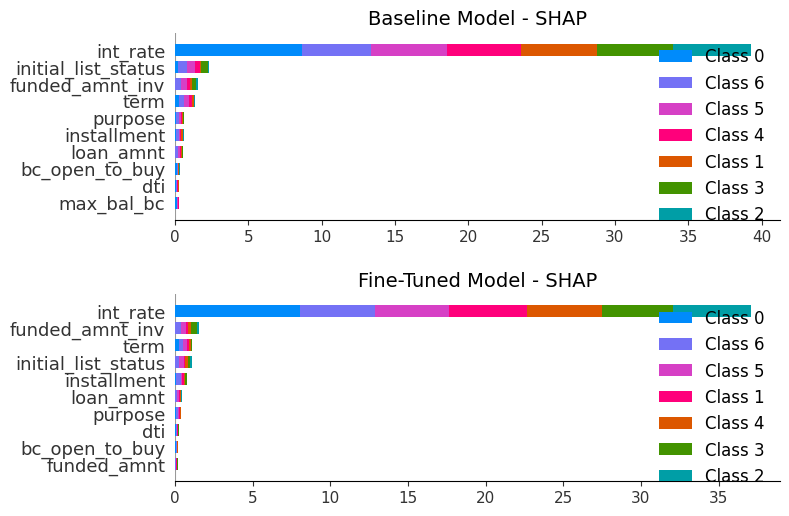

In [ ]:
import shap
import matplotlib.pyplot as plt

X_sample = X_val.sample(n=100, random_state=42)


explainer_base = shap.TreeExplainer(model)
shap_values_base = explainer_base.shap_values(X_sample)

explainer_ft = shap.TreeExplainer(continued_clf)
shap_values_ft = explainer_ft.shap_values(X_sample)


fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

# Baseline 
plt.sca(axes[0])
shap.summary_plot(shap_values_base, X_sample, max_display=10, plot_type="bar", show=False)
axes[0].set_title("Baseline Model - SHAP", fontsize=14)
axes[0].set_xlabel("")

# Fine-tuned 
plt.sca(axes[1])
shap.summary_plot(shap_values_ft, X_sample, max_display=10, plot_type="bar", show=False)
axes[1].set_title("Fine-Tuned Model - SHAP", fontsize=14)
axes[1].set_xlabel("")

plt.subplots_adjust(hspace=0.4)  
plt.show()
